# Deep Learning &mdash; Assignment 1

First assignment for the 2022 Deep Learning course (NWI-IMC070) of the Radboud University.

_Gijs van Tulder (g.vantulder@cs.ru.nl) and Twan van Laarhoven (tvanlaarhoven@cs.ru.nl)_

_September 2022_

-----

**Names: Lam Nguyen**

**Group: 41**

-----

**Instructions:**
* Fill in your names and the name of your group.
* Answer the questions and complete the code where necessary.
* Keep your answers brief, one or two sentences is usually enough.
* Re-run the whole notebook before you submit your work.
* Save the notebook as a PDF and submit that in Brightspace together with the `.ipynb` notebook file.
* The easiest way to make a PDF of your notebook is via File > Print Preview and then use your browser's print option to print to PDF.

## Objectives

In this assignment you will
1. Experiment with gradient descent optimization;
2. Derive and implement gradients for binary cross-entropy loss, the sigmoid function and a linear layer;
3. Test your gradient implementations with the finite difference method;
4. Use these components to implement and train a simple neural network.

In [31]:
%matplotlib inline
import numpy as np
import scipy.optimize
import sklearn.datasets
import matplotlib.pyplot as plt
import math

np.set_printoptions(suppress=True, precision=6, linewidth=200)
plt.style.use('ggplot')

## 1.1 Gradient descent optimization (5 points)

Consider the following function with two parameters and its derivatives:
\begin{align}
  f(x, y) &= x^2 + y^2 + x (y + 2) + \cos(3x) \\
  \frac{\partial f}{\partial x} &= 2x - 3\sin(3x) + y + 2 \\
  \frac{\partial f}{\partial y} &= x + 2y \\
\end{align}

In [32]:
def f(x, y):
    return x ** 2 + y ** 2 + x * (y + 2) + np.cos(3 * x)
def grad_x_f(x, y):
    return 2 * x - 3 * np.sin(3 * x) + y + 2
def grad_y_f(x, y):
    return x + 2 * y

A plot of the function shows that it has multiple local minima:

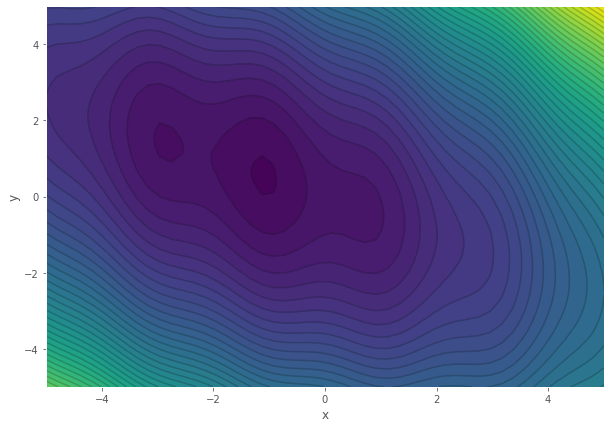

In [33]:
def plot_f_contours():
    xx, yy = np.meshgrid(np.linspace(-5, 5), np.linspace(-5, 5))
    zz = f(xx, yy)
    plt.contourf(xx, yy, zz, 50)
    plt.contour(xx, yy, zz, 50, alpha=0.2, colors='black', linestyles='solid')
    plt.xlabel('x')
    plt.ylabel('y')

plt.figure(figsize=(10, 7))
plot_f_contours()

### Implement gradient descent

We would like to find the minimum of this function using gradient descent.

**(a)<span style="float:right"> (1 point)</span> Implement the gradient descent updates for $x$ and $y$ in the function below:**

In [34]:
def optimize_f(x, y, step_size, steps):
    # keep track of the parameters we tried so far
    x_hist, y_hist = [x], [y]

    # run gradient descent for the number of steps
    for step in range(steps):
        # compute the gradients at the current point
        dx = grad_x_f(x, y)
        dy = grad_y_f(x, y)

        # apply the gradient descent updates to x and y
        x = x - step_size * dx # TODO: compute the update
        y = y - step_size * dy # TODO: compute the update

        # store the new parameters
        x_hist.append(x)
        y_hist.append(y)

    return x, y, f(x, y), x_hist, y_hist

### Tune the parameters

We will now try if our optimization method works.

Use this helper function to plot the results:

In [35]:
# helper function that plots the results of the gradient descent optimization
def plot_gradient_descent_results(x, y, val, x_hist, y_hist):
    # plot the path on the contour plot
    plt.figure(figsize=(20, 7))
    plt.subplot(1, 2, 1)
    plot_f_contours()
    plt.plot(x_hist, y_hist, '.-')
    
    # plot the learning curve
    plt.subplot(1, 2, 2)
    plt.plot(f(np.array(x_hist), np.array(y_hist)), '.r-')
    plt.title('Minimum value: %f' % f(x_hist[-1], y_hist[-1]))

**(b) Run the gradient descent optimization with the following initial settings:**

``x=3, y=2, step_size=0.1, steps=10``

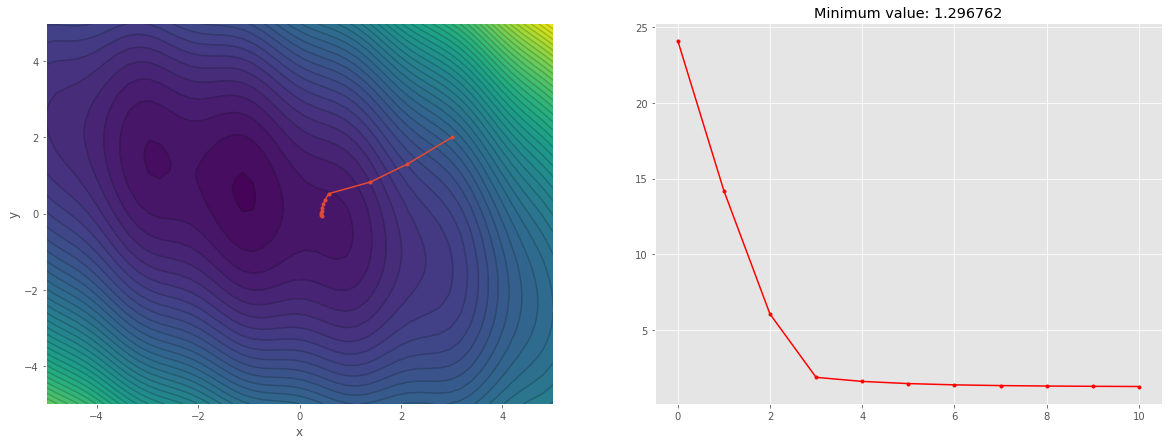

In [36]:
results = optimize_f(x=3, y=2, step_size=0.1, steps=10)
plot_gradient_descent_results(*results)

**(c)<span style="float:right"> (1 point)</span> Does it find the minimum of the function? What happens?**

Yes, the minimum of the function is 1.296 for $f(3,2)$. The gradient descent incrementally calculates toward the optimal value.

**(d) Try a few different values for the `step_size` and the number of `steps` to get close to the optimal solution:**

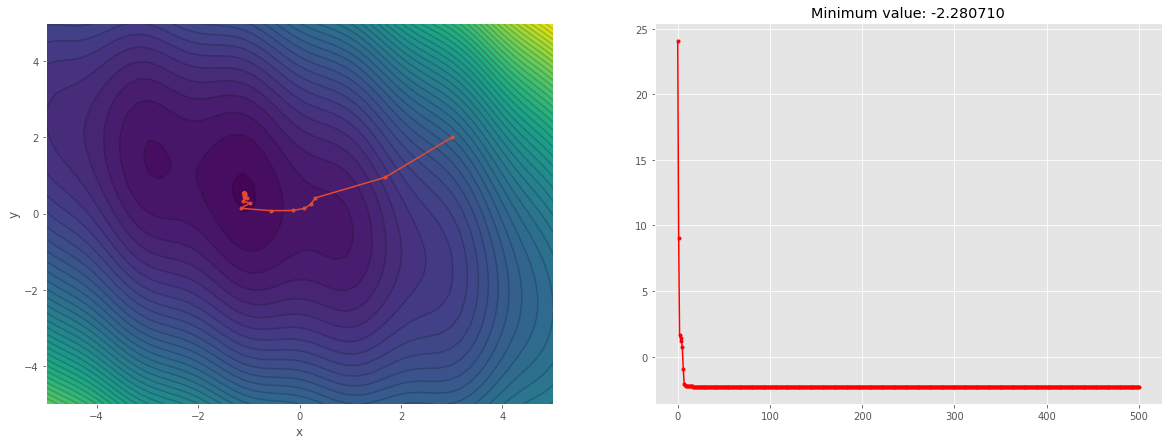

In [37]:
# TODO: tune the parameters to find a better optimum
results = optimize_f(x=3, y=2, step_size=0.15, steps=500)
plot_gradient_descent_results(*results)

**(e) Were you able to find a step size that reached the global optimum? If not, why not? What happens if you set the step size too large or too small?<span style="float:right"> (1 point)</span>**

Yes, I could find the optimal step size.

If step size is too big, then the function "overstep" the optimal value.

If step size is too small, then we might reach the optimal value, but taking extra computational memory in return.

### Implement a decreasing step size

You might get better results if you use a step size that is large at the beginning, but slowly decreases during the optimization.

Try the following scheme to compute the step size $\eta_t$ in step $t$, given a decay parameter $d$:
\begin{align}
  \eta_t = \eta_0 d^t
\end{align}

**(f) Update your optimization function to use this step size schedule:<span style="float:right"> (1 point)</span>**

In [38]:
def optimize_f_updated(x, y, step_size, steps, decay=1.0):
    # keep track of the parameters we tried so far
    x_hist, y_hist = [x], [y]
    step_size_init = step_size
    # run gradient descent for the number of steps
    for step in range(steps):
        # compute the gradients at this point
        dx = grad_x_f(x, y)
        dy = grad_y_f(x, y)

        # apply the gradient descent updates to x and y
        step_size = step_size_init * (decay ** step)
        x = x - step_size * dx  # TODO: compute the update including step size decay
        y = y - step_size * dy  # TODO: compute the update including step size decay

        # store the new parameters
        x_hist.append(x)
        y_hist.append(y)

    return x, y, f(x, y), x_hist, y_hist

**(g) Tune the `step_sizes`, `steps` and `decay` parameters to get closer to the global minimum:<span style="float:right"> (1 point)</span>**

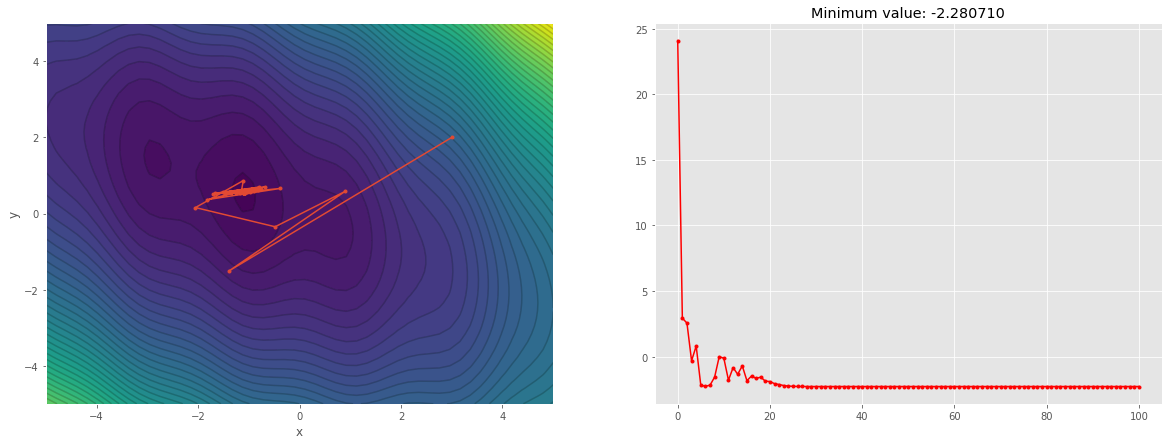

In [39]:
# TODO: tune the parameters to find the global optimum
results = optimize_f_updated(x=3, y=2, step_size=0.5, steps=100, decay=0.95)
plot_gradient_descent_results(*results)

We will now look at some more complex functions that we can try to optimize.

## 1.2 Neural network components (17 points)

In this assignment, we will implement a simple neural network from scratch. We need four components:
1. A sigmoid activation function,
2. A ReLU activation function,
3. A binary cross-entropy loss function,
4. A linear layer.

For each component, we will implement the forward pass, the backward pass, and the gradient descent update.

### Sigmoid non-linearity

The sigmoid function is defined as:

\begin{align}
\sigma(x) &= \frac{1}{1 + e^{-x}} \\
\end{align}

![Sigmoid](attachment:sigmoid.png)

**(a) Give the derivative of the sigmoid function:<span style="float:right"> (1 point)</span>**

\begin{align}
\frac{\partial \sigma(x)}{\partial x} &= \frac{e^{-x}}{(1+e^{-x})^2}
\end{align}

**(b) Implement the sigmoid and its gradient in the functions `sigmoid(x)` and `sigmoid_grad(x)`:<span style="float:right"> (2 points)</span>**

In [40]:
def sigmoid(x):
    # TODO: implement the sigmoid function
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    # TODO: implement the gradient of the sigmoid function
    return (np.exp(-x)) / (1 + np.exp(-x)) ** 2

# try with a random input
x = np.random.uniform(-10, 10, size=5)
print('x:', x)
print('sigmoid(x):', sigmoid(x))
print('sigmoid_grad(x):', sigmoid_grad(x))

x: [-2.070492 -2.359523 -3.824874 -0.344923  2.572467]
sigmoid(x): [0.111998 0.086312 0.021355 0.414614 0.929068]
sigmoid_grad(x): [0.099455 0.078862 0.020899 0.242709 0.0659  ]


To check that the gradient implementation is correct, we can compute the numerical derivative using the [finite difference](https://en.wikipedia.org/wiki/Finite_difference) method. From [Chapter 11.5 of the Deep Learning book](http://www.deeplearningbook.org/contents/guidelines.html):

> Because
  \begin{align}
    f'(x) = \lim_{\epsilon \rightarrow 0} \frac{f(x + \epsilon) - f(x)}{ \epsilon},
  \end{align}
  we can approximate the derivative by using a small, finite $\epsilon$:
  \begin{align}
    f'(x) \approx \frac{f(x + \epsilon) - f(x)}{\epsilon}.
  \end{align}
  We can improve the accuracy of the approximation by using the centered difference:
  \begin{align}
    f'(x) \approx \frac{f(x + \frac{1}{2} \epsilon) - f(x - \frac{1}{2} \epsilon)}{\epsilon}.
  \end{align}
  The perturbation size $\epsilon$ must be large enough to ensure that the perturbation is not rounded down too much by ﬁnite-precision numerical computations.

**(c) Use the central difference method to check your implementation of the sigmoid gradient. Compute the numerical gradient and check that it is close to the symbolic gradient computed by your implementation:<span style="float:right"> (1 point)</span>**

In [41]:
# start with some random inputs
x = np.random.uniform(-2, 2, size=5)

# compute the symbolic gradient
print('Symbolic', sigmoid_grad(x))

# TODO: compute the numerical gradient
pertubation = 0.01
num_grad = (sigmoid(x + 0.5 * pertubation) - sigmoid(x - 0.5 * pertubation)) / pertubation
print('Numerical', num_grad)

Symbolic [0.182016 0.227937 0.189904 0.187153 0.247842]
Numerical [0.182016 0.227937 0.189904 0.187153 0.247841]


**(d) Is the gradient computed with finite differences exactly the same as the analytic answer? Why (not)?<span style="float:right"> (1 point)</span>**

No, although from the computation they might look similar. The central different only approximates the derivative.

**If there is a big difference between the two gradients, please try to make this as small as possible before you continue.**

### Rectified linear units (ReLU)

The rectified linear unit is defined as:
\begin{align}
  f(x) = \max(0, x)
\end{align}

![relu.png](attachment:relu.png)

**(e) Give the derivative of the ReLU function:<span style="float:right"> (1 point)</span>**

\begin{align}
  \frac{\partial f(x)}{\partial x} &= 
    \begin{cases}
    0 \hspace{0.5cm} if \hspace{0.5cm} x < 0\\    
    1 \hspace{0.5cm} if \hspace{0.5cm} x > 0    
  \end{cases}
\end{align}

**(f) Implement the ReLU function and its gradient in the functions `relu(x)` and `relu_grad(x)`. Use the finite difference method to check that the gradient is correct:<span style="float:right"> (3 points)</span>***

In [42]:
def relu(x):
    # TODO: implement the relu function
    return np.maximum(0, x)

def relu_grad(x):
    return (x > 0).astype(int)


# try with a random input
x = np.random.uniform(-10, 10, size=5)
print('x:', x)
print('relu(x):', relu(x))
print('relu_grad(x):', relu_grad(x))
print()

# TODO: compute and compare the symbolic and numerical gradients
pertubation = 0.0001
num_grad = (relu(x + 0.5 * pertubation) - relu(x - 0.5 * pertubation)) / pertubation
print('numerical gradient', num_grad)

x: [-5.421873  8.036512 -0.048428  2.087507 -1.524647]
relu(x): [0.       8.036512 0.       2.087507 0.      ]
relu_grad(x): [0 1 0 1 0]

numerical gradient [0. 1. 0. 1. 0.]


### Comparing sigmoid and ReLU

The sigmoid and ReLU activation functions have slightly different characteristics.

**(g) Run the code below to plot the sigmoid and ReLU activation functions and their gradients:**

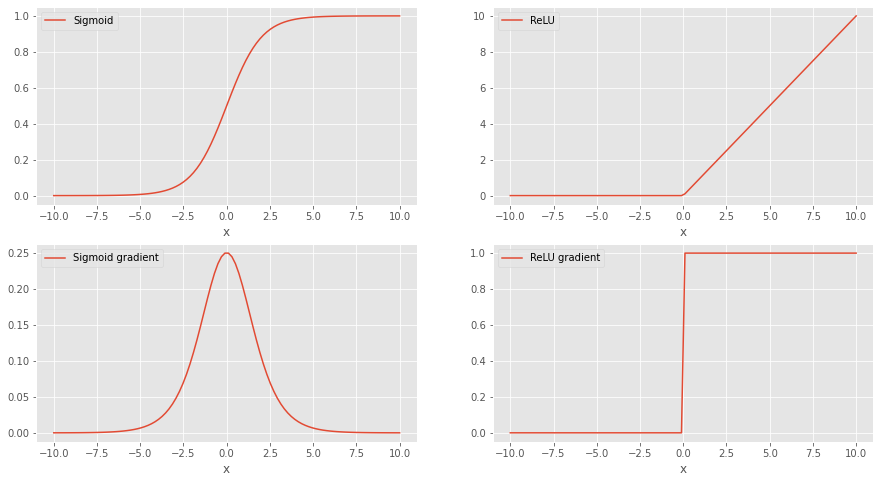

In [13]:
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.xlabel('x')
plt.legend(loc='upper left')

plt.subplot(2, 2, 2)
plt.plot(x, relu(x), label='ReLU')
plt.xlabel('x')
plt.legend(loc='upper left')

plt.subplot(2, 2, 3)
plt.plot(x, sigmoid_grad(x), label='Sigmoid gradient')
plt.xlabel('x')
plt.legend(loc='upper left')

plt.subplot(2, 2, 4)
plt.plot(x, relu_grad(x), label='ReLU gradient')
plt.xlabel('x')
plt.legend(loc='upper left');

**(h) Which activation function would you recommend for a network that outputs probabilities, i.e., outputs $\in [0, 1]$? Why?<span style="float:right"> (1 point)</span>**

I would recommend the RELU function, since the calculation is simpler (without the exponent)

**(i) Compare the gradients for sigmoid and ReLU. What are the advantages and disadvantages of each activation function in terms of their gradient?<span style="float:right"> (1 point)</span>**

The gradient from ReLU is less likely to vanish, when $x > 0$, the gradient from the sigmoid becomes increasingly small, when in ReLU the gradient has a constant value.

Advantages: \\
ReLU is more efficient to compute since it doesn't perform exponential calculation. \\
ReLU doesn't vanish the gradient. \\
ReLU converges more quickly.

Disadvantages: \\
Sigmoid vanishes the gradient. \\
ReLU won't work if too many inputs are smaller than zero, since the function will simply output zeroes.


### Binary cross-entropy loss

We will use the binary cross-entropy loss to train our network. This loss function is useful for binary classification.

The binary cross-entropy (BCE) is a function of the ground truth label $y \in \{0, 1\}$ and the predicted label $\hat{y} \in [0, 1]$:

\begin{align}
  \mathcal{L} &= -(y \log{\hat{y}} + (1-y) \log(1-\hat{y})) \\
\end{align}

To minimize the BCE loss with gradient descent, we need to compute the gradient with respect to the prediction $\hat{y}$.

**(j) Derive the gradient for the BCE loss:<span style="float:right"> (1 point)</span>**

\begin{align}
\frac{\partial \mathcal{L}}{\partial \hat{y}} &= \frac{\partial}{\partial \hat{y}}(-ylog(\hat{y})) - \frac{\partial}{\partial \hat{y}}(1-y)(log(1-\hat{y})) \\ =& \frac{-y}{\hat{y}} + \frac{1-y}{1-\hat{y}} 
\end{align}

**(k) Implement `bce_loss(y, y_hat)` and `bce_loss_grad(y, y_hat)` and use the finite difference method to check that the gradient is correct:<span style="float:right"> (3 points)</span>**

In [14]:
def bce_loss(y, y_hat):
    # TODO: implement the BCE loss
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
def bce_loss_grad(y, y_hat):
    # TODO: implement the gradient of the BCE loss
    return (-y / y_hat) + ((1 - y) / (1 - y_hat))

# try with some random inputs
y = np.random.randint(2, size=5)
y_hat = np.random.uniform(0, 1, size=5)
print('y:', y)
print('y_hat:', y_hat)
print('bceloss(y, y_hat):', bce_loss(y, y_hat))
print('bceloss_grad(y, y_hat):', bce_loss_grad(y, y_hat))

print()

# TODO: compute and compare the symbolic and numerical gradients
pertubation = 0.001
num_grad = (bce_loss(y, y_hat + 0.5 * pertubation) - bce_loss(y, y_hat - 0.5 * pertubation)) / pertubation
print('numerical gradient(y, y_hat)', num_grad)

y: [0 1 1 0 1]
y_hat: [0.916484 0.197638 0.58529  0.845262 0.65401 ]
bceloss(y, y_hat): [2.482716 1.621319 0.535647 1.866021 0.424632]
bceloss_grad(y, y_hat): [11.973739 -5.059761 -1.708554  6.462531 -1.529028]

numerical gradient(y, y_hat) [11.973882 -5.059772 -1.708554  6.462554 -1.529028]


### Linear layer

Finally, we need to compute the gradients for the linear layer in our network.

Define a linear model $\mathbf{y} = \mathbf{x} \mathbf{W} + \mathbf{b}$, where
* $\mathbf{x}$ is an input vector of shape $N$,
* $\mathbf{W}$ is a weight matrix of shape $N \times M$,
* $\mathbf{b}$ is a bias vector of shape $M$,
* $\mathbf{y}$ is the output vector of shape $M$.

**(l) Derive the gradients for $\mathbf{y}$ with respect to the input $\mathbf{x}$ and the parameters $\mathbf{W}$ and $\mathbf{b}$:<span style="float:right"> (1 point)</span>**

_Hint: If you have trouble computing this in matrix notation directly, try to do the computation with scalars r notation, writing the linear model as_
\begin{align}
  y_j = \sum_{i=1}^{N} x_i W_{ij} + b_j
\end{align}
where $j$ ranges from $1$ to $M$.

TODO: Your answer here.

\begin{align}
  \frac{\partial \mathbf{y}}{\partial \mathbf{x}} &= W \\
  \frac{\partial \mathbf{y}}{\partial \mathbf{W}} &= x\\
  \frac{\partial \mathbf{y}}{\partial \mathbf{b}} &= 1 \\
\end{align}

**(m) Given the gradient $\nabla_\mathbf{y} \mathcal{L}$ for the loss w.r.t. $\mathbf{y}$, use the chain rule to derive the gradients for the loss w.r.t. $\mathbf{x}$, $\mathbf{W}$ and $\mathbf{b}$:<span style="float:right"> (1 point)</span>**

TODO: Your answer here.

\begin{align}
  \nabla_\mathbf{x} \mathcal{L} &= \nabla_\mathbf{y} \mathcal{L} * W\\
  \nabla_\mathbf{W} \mathcal{L} &= \nabla_\mathbf{y} \mathcal{L} * x\\
  \nabla_\mathbf{b} \mathcal{L} &= \nabla_\mathbf{y} \mathcal{L} * 1\\
\end{align}

## 1.3 Implement a one-layer model (2 points)

We can now implement a simple one-layer model with a sigmoid activation:

1. Given an input vector $\mathbf{x}$, weight vector $\mathbf{w}$ and bias $b$, compute the output $\hat{y}$:

\begin{align}
h = \mathbf{x} \mathbf{w}^T + b \\
\hat{y} = \sigma(h) \\
\end{align}

2. Compute the BCE loss comparing the prediction $\hat{y}$ with the ground-truth label $y$.

3. Compute the gradient for the BCE loss and back-propagate this to get $\nabla_\mathbf{x} \mathcal{L}$, the gradient of $\mathcal{L}$ w.r.t. $\mathbf{x}$.

**(a) Complete the implementation below:<span style="float:right"> (2 points)</span>**

In [15]:
# initialize parameters
w = np.random.uniform(size=5)
b = np.random.rand()

# implement the model
def fn(x, y):
    # TODO: forward: compute h, y_hat, loss
    h = np.dot(np.transpose(x), w) + b
    y_hat = sigmoid(h)
    loss = bce_loss(y, y_hat)
    
    # TODO: backward: compute grad_y_hat, grad_h, grad_x
    grad_y_hat = bce_loss_grad(y, y_hat)
    grad_h = grad_y_hat * sigmoid_grad(h)
    grad_x = grad_h * w
    
    return loss, grad_x

# test with a random input
x = np.random.uniform(size=5)
y = 1

loss, grad_x = fn(x, y)
print("Loss", loss)
print("Gradient", grad_x)

Loss 0.05700825491603481
Gradient [-0.03176  -0.036639 -0.030347 -0.003181 -0.039153]


**(b) Use the finite-difference method to check the gradient $\nabla_\mathbf{x} \mathcal{L}$:**

In [16]:
# start with some random inputs
x = np.random.uniform(size=5)
y = 1

# set epsilon to a small value
eps = 0.00001

numerical_grad = np.zeros(x.shape)
# compute the gradient for each element of x separately
for i in range(len(x)):
    # compute inputs at -eps/2 and +eps/2
    x_a, x_b = x.copy(), x.copy()
    x_a[i] += eps / 2
    x_b[i] -= eps / 2

    # compute the gradient for this element
    loss_a, _ = fn(x_a, y)
    loss_b, _ = fn(x_b, y)
    numerical_grad[i] = (loss_a - loss_b) / eps

# compute the symbolic gradient
loss, symbolic_grad = fn(x, y)
    
print("Symbolic gradient")
print(symbolic_grad)
print("Numerical gradient")
print(numerical_grad)

Symbolic gradient
[-0.072936 -0.084142 -0.069692 -0.007305 -0.089915]
Numerical gradient
[-0.072936 -0.084142 -0.069692 -0.007305 -0.089915]


## 1.4 Implement a linear layer and the sigmoid and ReLU activation functions (7 points)

We will now construct a simple neural network. We need to implement the following objects:
* `Linear`: a layer that computes `y = x*W + b`.
* `Sigmoid`: a layer that computes `y = sigmoid(x)`.
* `ReLU`: a layer that computes `y = relu(x)`.

For each layer class, we need to implement the following methods:
* `forward`: The forward pass that computes the output `y` given `x`.
* `backward`: The backward pass that receives the gradient for `y` and computes the gradients for the input `x` and the parameters of the layer.
* `step`: The update step that applies the gradient updates to the parameters of the layer, based on the gradient computed and stored by `backward`.

**(a) Implement a class `Linear` that computes `y = x*W + b`:<span style="float:right"> (3 points)</span>**

In [17]:
# Computes y = x * w + b.
class Linear:
    def __init__(self, n_in, n_out):
        # initialize the weights randomly,
        # using the Xavier initialization rule for scale
        a = np.sqrt(6 / (n_in * n_out))
        self.W = np.random.uniform(-a, a, size=(n_in, n_out))
        self.b = np.zeros((n_out,))

    def forward(self, x):
        # TODO: compute the forward pass
        y = np.dot(x, self.W) + self.b
        return y

    def backward(self, x, dy):
        # TODO: compute the backward pass,
        # given dy, compute the gradients for x, W and b
        dx = np.dot(dy, np.transpose(self.W))     
        self.dW = np.dot(np.transpose(x), dy)
        self.db = np.sum(dy, axis = 0)
        return dx
    
    def step(self, step_size):
        # TODO: apply a gradient descent update step
        self.W = self.W - step_size * self.dW
        self.b = self.b - step_size * self.db
        
    def __str__(self):
        return 'Linear %dx%d' % self.W.shape


# Try the new class with some random values.
# Debugging tip: always choose a unique length for each
# dimension, so you'll get an error if you mix them up.
x = np.random.uniform(size=(3, 5))

layer = Linear(5, 7)
y = layer.forward(x)
dx = layer.backward(x, np.ones_like(y))
print('y:', y)
print('dx:', dx)

y: [[-0.509234 -0.444119 -0.423183 -0.612865 -0.369382  0.596818  0.019545]
 [-0.131354 -0.280998 -0.283011 -0.337473 -0.002939  0.358005  0.226795]
 [-0.595627  0.111805 -0.407162 -0.18203  -0.253923  0.108906  0.087751]]
dx: [[ 0.052508 -0.500617  0.100895 -0.254273 -1.732583]
 [ 0.052508 -0.500617  0.100895 -0.254273 -1.732583]
 [ 0.052508 -0.500617  0.100895 -0.254273 -1.732583]]


**(b) Implement a class `Sigmoid` that computes `y = 1 / (1 + exp(-x))`:<span style="float:right"> (2 points)</span>**

In [18]:
# Computes y = 1 / (1 + exp(-x)).
class Sigmoid:
    def forward(self, x):
        # TODO: compute the forward pass
        return sigmoid(x)

    def backward(self, x, dy):
        # TODO: compute the backward pass,
        # return the gradient for x given dy
        return dy * sigmoid_grad(x)

    def step(self, step_size):
        pass

    def __str__(self):
        return 'Sigmoid'


# try the new class with some random values
x = np.random.uniform(size=(3, 5))

layer = Sigmoid()
y = layer.forward(x)
dx = layer.backward(x, np.ones_like(y))
print('y:', y)
print('dx:', dx)

y: [[0.574417 0.595876 0.582136 0.719371 0.709465]
 [0.512756 0.703801 0.678644 0.596498 0.659629]
 [0.706595 0.636218 0.543816 0.672194 0.536366]]
dx: [[0.244462 0.240808 0.243254 0.201876 0.206125]
 [0.249837 0.208465 0.218086 0.240688 0.224519]
 [0.207318 0.231445 0.24808  0.220349 0.248678]]


**(c) Implement a class `ReLU` that computes `y = max(0, x)`:<span style="float:right"> (2 points)</span>**

In [19]:
# Computes y = max(0, x).
class ReLU:
    def forward(self, x):
        # TODO: compute the forward pass
        return relu(x)

    def backward(self, x, dy):
        # TODO: compute the backward pass,
        # return the gradient for x given dy
        return dy * relu_grad(x)
    
    def step(self, step_size):
        pass
    
    def __str__(self):
        return 'ReLU'


# try the new class with some random values
x = np.random.uniform(-10, 10, size=(3, 5))

layer = ReLU()
y = layer.forward(x)
dx = layer.backward(x, np.ones_like(y))
print('y:', y)
print('dx:', dx)

y: [[0.       6.202514 0.       0.       0.      ]
 [0.05461  8.059683 0.       0.       0.      ]
 [6.196099 0.       7.420325 0.       0.      ]]
dx: [[0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0.]]


### Verify the gradients

The code below will check your implementations using SciPy's finite difference implementation [`check_grad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.check_grad.html). This is similar to what we did manually before, but automates some of the work.

**(d) Run the code and check that the error is not too large.**

In [20]:
## Verify gradient computations for Linear
# test for dx
layer = Linear(5, 7)
def test_fn(x):
    x = x.reshape(3, 5)
    # multiply the output with a constant to check if
    # the gradient uses dy
    return 2 * np.sum(layer.forward(x))
def test_fn_grad(x):
    x = x.reshape(3, 5)
    # multiply the incoming dy gradient with a constant
    return layer.backward(x, 2 * np.ones((3, 7))).flatten()

err = scipy.optimize.check_grad(test_fn, test_fn_grad,
                                np.random.uniform(-10, 10, size=3 * 5))
print("err on dx:", "OK" if np.abs(err) < 1e-5 else "ERROR", err)

# test for dW
x = np.random.uniform(size=(3, 5))
layer = Linear(5, 7)
def test_fn(w):
    layer.W = w.reshape(5, 7)
    # multiply the output with a constant to check if
    # the gradient uses dy
    return 2 * np.sum(layer.forward(x))
def test_fn_grad(w):
    layer.W = w.reshape(5, 7)
    # multiply the incoming dy gradient with a constant
    layer.backward(x, 2 * np.ones((3, 7)))
    return layer.dW.flatten()

err = scipy.optimize.check_grad(test_fn, test_fn_grad,
                                np.random.uniform(-10, 10, size=5 * 7))
print("err on dW:", "OK" if np.abs(err) < 1e-5 else "ERROR", err)

# test for db
x = np.random.uniform(size=(3, 5,))
layer = Linear(5, 7)
def test_fn(b):
    layer.b = b
    # multiply the output with a constant to check if
    # the gradient uses dy
    return 2 * np.sum(layer.forward(x))
def test_fn_grad(b):
    layer.b = b
    # multiply the incoming dy gradient with a constant
    layer.backward(x, 2 * np.ones((x.shape[0], 7)))
    return layer.db

err = scipy.optimize.check_grad(test_fn, test_fn_grad,
                                np.random.uniform(-10, 10, size=7))
print("err on db:", "OK" if np.abs(err) < 1e-5 else "ERROR", err)

err on dx: OK 4.4156802124323676e-07
err on dW: OK 7.87507346326575e-06
err on db: OK 0.0


In [21]:
## Verify gradient computation for Sigmoid
# test for dx
layer = Sigmoid()
def test_fn(x):
    # multiply the output with a constant to check if
    # the gradient uses dy
    return np.sum(2 * layer.forward(x))
def test_fn_grad(x):
    # multiply the incoming dy gradient with a constant
    return layer.backward(x, 2 * np.ones(x.shape))

err = scipy.optimize.check_grad(test_fn, test_fn_grad,
                                np.random.uniform(-10, 10, size=5))
print("err on dx:", "OK" if np.abs(err) < 1e-5 else "ERROR", err)

err on dx: OK 2.5013858397940988e-08


In [22]:
## Verify gradient computation for ReLU
# test for dx
layer = ReLU()
def test_fn(x):
    # multiply the output with a constant to check if
    # the gradient uses dy
    return 2 * np.sum(layer.forward(x))
def test_fn_grad(x):
    # multiply the incoming dy gradient with a constant
    return layer.backward(x, 2 * np.ones(x.shape))

err = scipy.optimize.check_grad(test_fn, test_fn_grad,
                                np.random.uniform(1, 10, size=5))
print("err on dx:", "OK" if np.abs(err) < 1e-5 else "ERROR", err)

err on dx: OK 0.0


## 1.5 Construct a neural network with back-propagation

We will use the following container class to implement the network:
1. The `forward` pass computes the output of each layer. We store the intermediate inputs for the backward pass.
2. The `backward` pass computes the gradients for each layer, in reverse order, by using the original input `x` and the gradient `dy` from the previous layer.
3. The `step` function will ask each layer to apply the gradient descent updates to its weights.

**(a) Read the code below:**

In [23]:
class Net:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, x):
        # compute the forward pass for each layer
        trace = []
        for layer in self.layers:
            # compute the forward pass
            y = layer.forward(x)
            # store the original input for the backward pass
            trace.append((layer, x))
            x = y
        # return the final output and the history trace
        return y, trace

    def backward(self, trace, dy):
        # compute the backward pass for each layer
        for layer, x in trace[::-1]:
            # compute the backward pass using the original input x
            dy = layer.backward(x, dy)

    def step(self, learning_rate):
        # apply the gradient descent updates of each layer
        for layer in self.layers:
            layer.step(learning_rate)

    def __str__(self):
        return '\n'.join(str(l) for l in self.layers)

## 1.6 Training the network (8 points)

We load a simple dataset with 360 handwritten digits.

Each sample has $8 \times 8$ pixels, arranged as a 1D vector of 64 features.

We create a binary classification problem with the label 0 for the digits 0 to 4, and 1 for the digits 5 to 9.

digits_x.shape: (1797, 64)
digits_y.shape: (1797,)
min, max values: -0.8117561971974786 1.847470154168513
labels: [0. 1.]


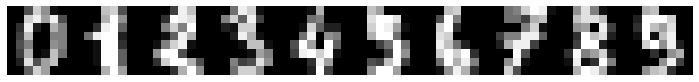

In [24]:
# load the first two classes of the digits dataset
dataset = sklearn.datasets.load_digits()
digits_x, digits_y = dataset['data'], dataset['target']

# create a binary classification problem
digits_y = (digits_y < 5).astype(float)

# plot some of the digits
plt.figure(figsize=(10, 2))
plt.imshow(np.hstack([digits_x[i].reshape(8, 8) for i in range(10)]), cmap='gray')
plt.grid(False)
plt.tight_layout()
plt.axis('off')

# normalize the values to [0, 1]
digits_x -= np.mean(digits_x)
digits_x /= np.std(digits_x)

# print some statistics
print('digits_x.shape:', digits_x.shape)
print('digits_y.shape:', digits_y.shape)
print('min, max values:', np.min(digits_x), np.max(digits_x))
print('labels:', np.unique(digits_y))

We divide the dataset in a train and a test set.

In [25]:
# make a 50%/50% train/test split
train_prop = 0.5
n_train = int(digits_x.shape[0] * train_prop)

# shuffle the images
idxs = np.random.permutation(digits_x.shape[0])

# take a subset
x = {'train': digits_x[idxs[:n_train]],
     'test':  digits_x[idxs[n_train:]]}
y = {'train': digits_y[idxs[:n_train]],
     'test':  digits_y[idxs[n_train:]]}

print('Training samples:', x['train'].shape[0])
print('Test samples:', x['test'].shape[0])

Training samples: 898
Test samples: 899


We will now implement a function that trains the network. For each epoch, it loops over all minibatches in the training set and updates the network weights. It will then compute the loss and accuracy for the test samples. Finally, it will plot the learning curves.

**(a) Read through the code below.**

In [26]:
def fit(net, x, y, epochs=25, learning_rate=0.001, mb_size=10):
    # initialize the loss and accuracy history
    loss_hist = {'train': [], 'test': []}
    accuracy_hist = {'train': [], 'test': []}

    for epoch in range(epochs):
        # initialize the loss and accuracy for this epoch
        loss = {'train': 0.0, 'test': 0.0}
        accuracy = {'train': 0.0, 'test': 0.0}

        # first train on training data, then evaluate on the test data
        for phase in ('train', 'test'):
            # compute the number of minibatches
            steps = x[phase].shape[0] // mb_size

            # loop over all minibatches
            for step in range(steps):
                # get the samples for the current minibatch
                x_mb = x[phase][(step * mb_size):((step + 1) * mb_size)]
                y_mb = y[phase][(step * mb_size):((step + 1) * mb_size), None]

                # compute the forward pass through the network
                pred_y, trace = net.forward(x_mb)

                # compute the current loss and accuracy
                loss[phase] += np.mean(bce_loss(y_mb, pred_y))
                accuracy[phase] += np.mean((y_mb > 0.5) == (pred_y > 0.5))

                # only update the network in the training phase
                if phase == 'train':
                    # compute the gradient for the loss
                    dy = bce_loss_grad(y_mb, pred_y)

                    # backpropagate the gradient through the network
                    net.backward(trace, dy)

                    # update the weights
                    net.step(learning_rate)

            # compute the mean loss and accuracy over all minibatches
            loss[phase] = loss[phase] / steps
            accuracy[phase] = accuracy[phase] / steps

            # add statistics to history
            loss_hist[phase].append(loss[phase])
            accuracy_hist[phase].append(accuracy[phase])

        print('Epoch %3d: loss[train]=%7.4f  accuracy[train]=%7.4f  loss[test]=%7.4f  accuracy[test]=%7.4f' %
              (epoch, loss['train'], accuracy['train'], loss['test'], accuracy['test']))

    # plot the learning curves
    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, 2, 1)
    for phase in loss_hist:
        plt.plot(loss_hist[phase], label=phase)
    plt.title('BCE loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    for phase in accuracy_hist:
        plt.plot(accuracy_hist[phase], label=phase)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

We will define a two-layer network:
* A linear layer that maps the 64 features of the input to 32 features.
* A ReLU activation function.
* A linear layer that maps the 32 features to the 1 output features.
* A sigmoid activation function that maps the output to [0, 1].

**(b) Train the network and inspect the results. Tune the hyperparameters to get a good result.<span style="float:right"> (1 point)</span>**

Epoch   0: loss[train]= 0.5193  accuracy[train]= 0.7429  loss[test]= 0.2929  accuracy[test]= 0.9120
Epoch   1: loss[train]= 0.2665  accuracy[train]= 0.9040  loss[test]= 0.1950  accuracy[test]= 0.9417
Epoch   2: loss[train]= 0.1676  accuracy[train]= 0.9440  loss[test]= 0.1551  accuracy[test]= 0.9486
Epoch   3: loss[train]= 0.1260  accuracy[train]= 0.9577  loss[test]= 0.1368  accuracy[test]= 0.9543
Epoch   4: loss[train]= 0.1031  accuracy[train]= 0.9703  loss[test]= 0.1350  accuracy[test]= 0.9520
Epoch   5: loss[train]= 0.0859  accuracy[train]= 0.9794  loss[test]= 0.1247  accuracy[test]= 0.9566
Epoch   6: loss[train]= 0.0725  accuracy[train]= 0.9829  loss[test]= 0.1219  accuracy[test]= 0.9543
Epoch   7: loss[train]= 0.0620  accuracy[train]= 0.9874  loss[test]= 0.1112  accuracy[test]= 0.9554
Epoch   8: loss[train]= 0.0534  accuracy[train]= 0.9897  loss[test]= 0.1052  accuracy[test]= 0.9589
Epoch   9: loss[train]= 0.0471  accuracy[train]= 0.9909  loss[test]= 0.1026  accuracy[test]= 0.9611


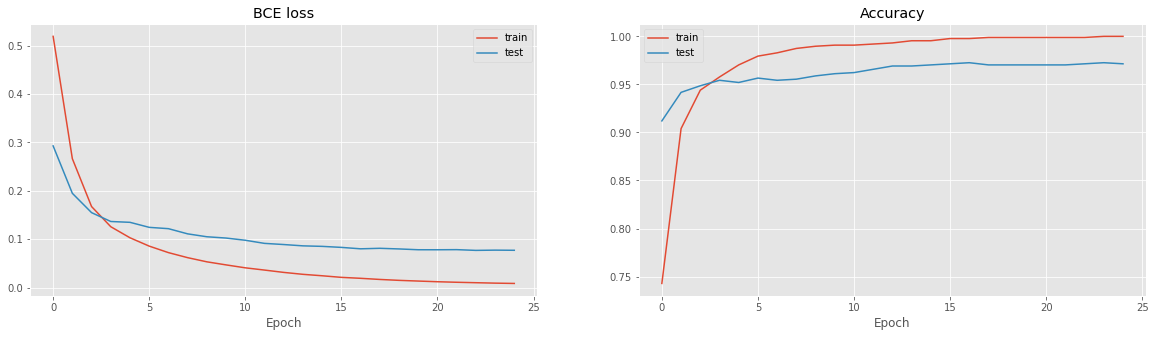

In [27]:
# construct network
net = Net([
        Linear(64, 32),
        ReLU(),
        Linear(32, 1),
        Sigmoid()])

# TODO: tune the hyperparameters
fit(net, x, y,
    epochs = 25,
    learning_rate = 0.01,
    mb_size = 35)
    

# Note: add more cells below if you want to keep runs with different hyperparameters. Make sure to also copy the network construction.

**(c) How did each of the hyperparameters (number of epochs, learning rate, minibatch size) influence your results? How important is it to set each correctly?<span style="float:right"> (1 point)</span>**

The lower the number of epochs, the less "steps" we will see how the BCE loss is minimized and how the accuracy is maximized. There is no perfect epoch value, one should  try different values and determine what is best for the model.

The lower the learning rate, the longer epochs it will take to minimize BCE loss. If it's too slow, the gradient descent will take a lot longer, if it's too high, then the gradient descent might diverge.

The lower the minibatch size, the more discrepancy we can see between the train set and test set for both BCE Loss and Accuracy. The lower minibatch size also means that we're able to update the parameters more often, which allows better convergence.

**(d) Create and train a network with one linear layer followed by a sigmoid activation:<span style="float:right"> (1 point)</span>**

`net = Net([Linear(...), Sigmoid()]`

Epoch   0: loss[train]= 0.5155  accuracy[train]= 0.7486  loss[test]= 0.3601  accuracy[test]= 0.8571
Epoch   1: loss[train]= 0.3472  accuracy[train]= 0.8651  loss[test]= 0.3385  accuracy[test]= 0.8720
Epoch   2: loss[train]= 0.3154  accuracy[train]= 0.8777  loss[test]= 0.3272  accuracy[test]= 0.8731
Epoch   3: loss[train]= 0.2994  accuracy[train]= 0.8834  loss[test]= 0.3189  accuracy[test]= 0.8720
Epoch   4: loss[train]= 0.2895  accuracy[train]= 0.8914  loss[test]= 0.3127  accuracy[test]= 0.8777
Epoch   5: loss[train]= 0.2827  accuracy[train]= 0.8926  loss[test]= 0.3082  accuracy[test]= 0.8800
Epoch   6: loss[train]= 0.2778  accuracy[train]= 0.8914  loss[test]= 0.3049  accuracy[test]= 0.8846
Epoch   7: loss[train]= 0.2740  accuracy[train]= 0.8926  loss[test]= 0.3023  accuracy[test]= 0.8846
Epoch   8: loss[train]= 0.2711  accuracy[train]= 0.8937  loss[test]= 0.3004  accuracy[test]= 0.8869
Epoch   9: loss[train]= 0.2688  accuracy[train]= 0.8960  loss[test]= 0.2989  accuracy[test]= 0.8869


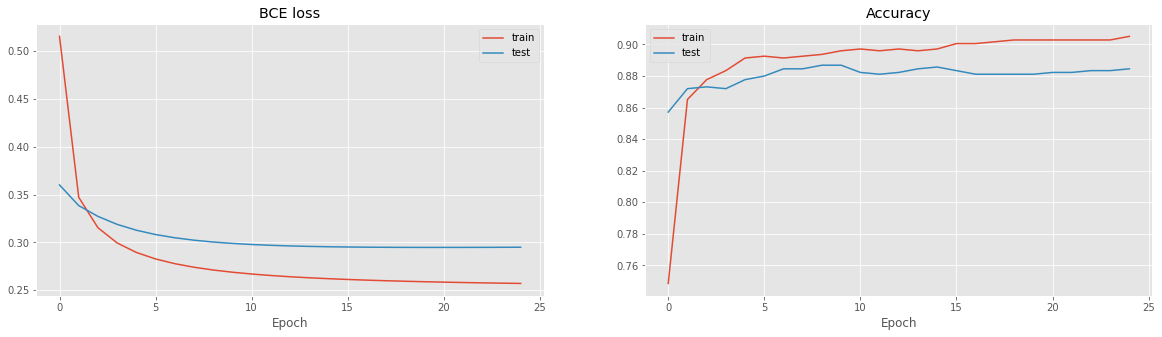

In [28]:
# TODO: Your code here.
# construct network
net = Net([
        Linear(64, 1),
        Sigmoid()])

# TODO: tune the hyperparameters
fit(net, x, y,
    epochs = 25,
    learning_rate = 0.01,
    mb_size = 35)

**(e) Discuss your results. Compare the results of this single-layer network with those of the network you trained before.<span style="float:right"> (1 point)</span>**

The loss and accuracy result is similar to the [Linear, ReLU, Linear, Sigmoid] layers, however, the additional ReLu layer gives the previous model more accuracy.

**(f) Repeat the experiment with a network with two linear layers, followed by a sigmoid activation: `[Linear, Linear, Sigmoid]`.<span style="float:right"> (1 point)</span>**

Epoch   0: loss[train]= 0.6277  accuracy[train]= 0.7246  loss[test]= 0.3676  accuracy[test]= 0.8606
Epoch   1: loss[train]= 0.3911  accuracy[train]= 0.8286  loss[test]= 0.3442  accuracy[test]= 0.8709
Epoch   2: loss[train]= 0.3299  accuracy[train]= 0.8720  loss[test]= 0.3331  accuracy[test]= 0.8663
Epoch   3: loss[train]= 0.3096  accuracy[train]= 0.8869  loss[test]= 0.3267  accuracy[test]= 0.8674
Epoch   4: loss[train]= 0.2976  accuracy[train]= 0.8869  loss[test]= 0.3217  accuracy[test]= 0.8674
Epoch   5: loss[train]= 0.2896  accuracy[train]= 0.8880  loss[test]= 0.3176  accuracy[test]= 0.8663
Epoch   6: loss[train]= 0.2839  accuracy[train]= 0.8857  loss[test]= 0.3140  accuracy[test]= 0.8709
Epoch   7: loss[train]= 0.2795  accuracy[train]= 0.8891  loss[test]= 0.3109  accuracy[test]= 0.8754
Epoch   8: loss[train]= 0.2761  accuracy[train]= 0.8914  loss[test]= 0.3081  accuracy[test]= 0.8789
Epoch   9: loss[train]= 0.2732  accuracy[train]= 0.8937  loss[test]= 0.3056  accuracy[test]= 0.8811


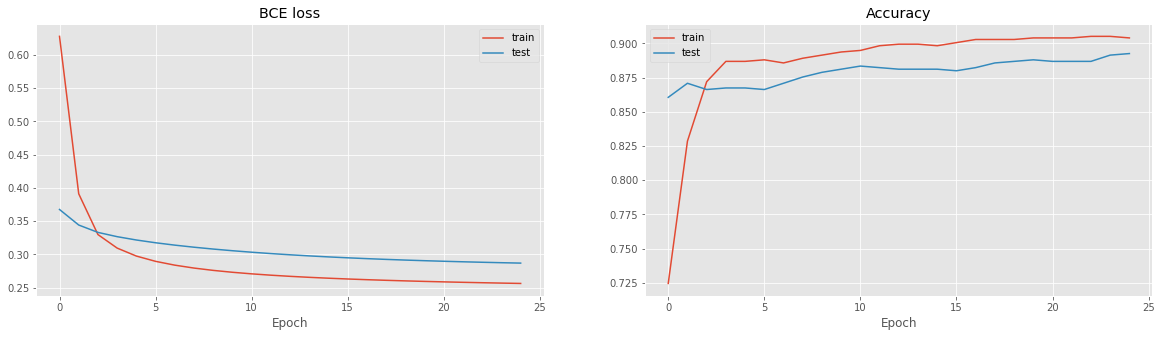

In [29]:
# TODO: Your code here.
# construct network
net = Net([
        Linear(64, 32),
        Linear(32, 1),
        Sigmoid()])

# TODO: tune the hyperparameters
fit(net, x, y,
    epochs = 25,
    learning_rate = 0.01,
    mb_size = 35)

**(g) How does the performance of this network compare with the previous networks. Can you explain this result? What is the influence of the activation functions in the network?<span style="float:right"> (1 point)</span>**

Compare to the initial network, the removal of ReLU layer decreased the accuracy by ~10% and increased the loss by 2.5 times. This can be explained by the network not being able to handle non-linearity by removal of ReLU.

**(h) One way to improve the performance of a neural network is by increasing the number of layers. Try a deeper network (e.g., a network with four linear layers) to see if this outperforms the previous networks.<span style="float:right"> (1 point)</span>**

Epoch   0: loss[train]= 0.6671  accuracy[train]= 0.5943  loss[test]= 0.5712  accuracy[test]= 0.7691
Epoch   1: loss[train]= 0.5036  accuracy[train]= 0.7840  loss[test]= 0.3083  accuracy[test]= 0.9017
Epoch   2: loss[train]= 0.2838  accuracy[train]= 0.8823  loss[test]= 0.1863  accuracy[test]= 0.9451
Epoch   3: loss[train]= 0.1815  accuracy[train]= 0.9326  loss[test]= 0.1377  accuracy[test]= 0.9497
Epoch   4: loss[train]= 0.1116  accuracy[train]= 0.9634  loss[test]= 0.1076  accuracy[test]= 0.9623
Epoch   5: loss[train]= 0.0858  accuracy[train]= 0.9737  loss[test]= 0.0981  accuracy[test]= 0.9611
Epoch   6: loss[train]= 0.0747  accuracy[train]= 0.9726  loss[test]= 0.0883  accuracy[test]= 0.9669
Epoch   7: loss[train]= 0.0500  accuracy[train]= 0.9829  loss[test]= 0.0754  accuracy[test]= 0.9680
Epoch   8: loss[train]= 0.0351  accuracy[train]= 0.9920  loss[test]= 0.0853  accuracy[test]= 0.9691
Epoch   9: loss[train]= 0.0295  accuracy[train]= 0.9909  loss[test]= 0.1041  accuracy[test]= 0.9611


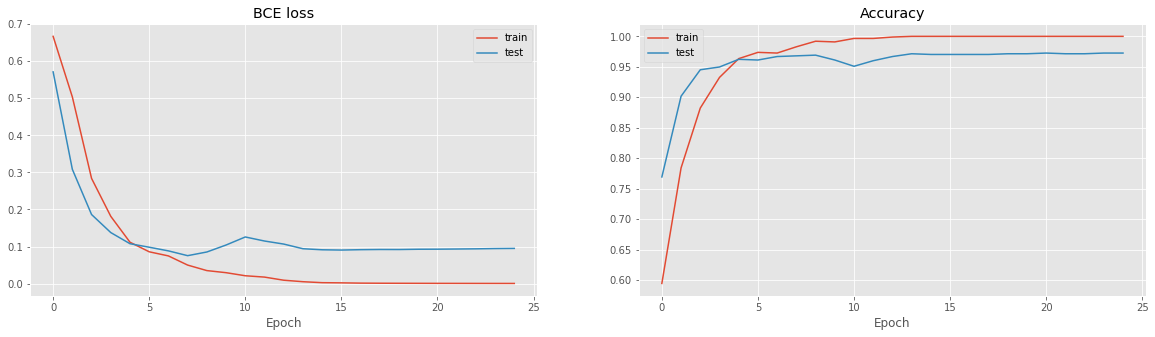

In [30]:
# TODO: Your code here.
# construct network
net = Net([
        Linear(64, 32),
        ReLU(),
        Linear(32, 16),
        ReLU(),
        Linear(16,8),
        ReLU(),
        Linear(8,1),
        Sigmoid()])

# TODO: tune the hyperparameters
fit(net, x, y,
    epochs = 25,
    learning_rate = 0.01,
    mb_size = 35)

**(i) Discuss your findings. Were you able to obtain a perfect classification? Explain the learning curves.<span style="float:right"> (1 point)</span>**

Compared to the initial network, the loss and accuracy fluctuated in the 5-10 epochs range and eventually achieved similar results. We can see that the network is "overfitted" for training set, but not for testing set as its curve doesn't follow as closely with the training curve (for BCE Loss).

## 1.7 Final questions (6 points)

You now have some experience training neural networks. Time for a few final questions.

**(a) What is the influence of the learning rate? What happens if the learning rate is too low or too high?<span style="float:right"> (2 points)</span>**

The learning rate affects the step size to calculate the gradient. If it's too low, the gradient descent will take a lot longer, if it's too high, then the gradient descent might diverge.

**(b) What is the role of the minibatch size in SGD? Explain the downsides of a minibatch size that is too small or too high.<span style="float:right"> (2 points)</span>**

The minibatch size uses a subset from the dataset for each epoch.

The lower the minibatch size, the more discrepancy we can see between the train set and test set for both BCE Loss and Accuracy. The lower minibatch size also means that we're able to update the parameters more often, which allows better convergence.

**(c) In the linear layer, we initialized the weights $w$ with random values, but we initialized the bias $b$ with zeros. What would happen if the weights $w$ were initialised as zeros? Why is this not a problem for the bias?<span style="float:right"> (2 points)</span>**

When we initialize $w$ as zeroes, it will cause the whole layer to stuck at zero and never being updated since $w$ are updated with multiplication.

This is not a problem for the bias because it's updated by addition.

## The end

Well done! Please double check the instructions at the top before you submit your results.

*This assignment has 45 points.*